In [20]:
import psycopg2

class connection:
    def __init__(self):
        DB_NAME = "uday"
        DB_USER = "postgres"
        DB_PASSWORD = "1996"
        DB_HOST = "localhost"  # Change if using a remote server
        DB_PORT = "5432"  # Default PostgreSQL port
        self.conn = None
        try:
            self.conn = psycopg2.connect(
                dbname=DB_NAME,
                user=DB_USER,
                password=DB_PASSWORD,
                host=DB_HOST,
                port=DB_PORT
            )
            self.cursor = self.conn.cursor()
            print("✅ Database connected successfully!")
        except Exception as e:
            print(f"❌ Database connection error: {e}")

    def safe_int(self, value):
        try:
            return int(value)
        except ValueError:
            return 0  # Not: return 0,   which would return a tuple!

    def safe_float(self, value):
        try:
            return float(value)
        except ValueError:
            return 0.0


    def addStudent1(self, student):
        try:
            insert_query = """
                INSERT INTO student_data (
                    Name, School, Sex, Age, Address, FamilySize, ParentStatus,
                    MotherEdu, FatherEdu, MotherJob, FatherJob, Reason, Guardian,
                    TravelTime, StudyTime, Failures, SchoolSup, FamilySup, Paid, Activities,
                    Nursery, HigherEdu, Internet, Romantic, FamilyRel, FreeTime, GoOut, Health,
                    Absences, Math_Marks, Math_Credits, English_Marks, English_Credits,
                    Science_Marks, Science_Credits, History_Marks, History_Credits, sgpa
                ) VALUES (
                    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, 
                    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
                );
                """
            columns = [
                "Name", "School", "Sex", "Age", "Address", "FamilySize", "ParentStatus", "MotherEdu",
                "FatherEdu", "MotherJob", "FatherJob", "Reason", "Guardian", "TravelTime", "StudyTime", "Failures",
                "SchoolSup", "FamilySup", "Paid", "Activities", "Nursery", "HigherEdu", "Internet", "Romantic",
                "FamilyRel", "FreeTime", "GoOut", "Health", "Absences", "Math_Marks", "Math_Credits", "English_Marks",
                "English_Credits", "Science_Marks", "Science_Credits", "History_Marks", "History_Credits", "sgpa"
            ]

            student_values = (
                student.name, student.school[0], student.sex[0], self.safe_int(student.age), student.address[0],
                student.family_size.split()[0], student.parent_status[0], self.safe_int(student.mother_edu), self.safe_int(student.father_edu),
                student.mother_job, student.father_job, student.reason, student.guardian,
                self.safe_int(student.travel_time), self.safe_int(student.study_time), self.safe_int(student.failures), 
                student.school_sup[0], student.family_sup[0], student.paid[0], student.activities[0],
                student.nursery[0], student.higher_edu[0], student.internet[0], student.romantic[0],
                self.safe_int(student.family_rel), self.safe_int(student.free_time), self.safe_int(student.go_out), 
                self.safe_int(student.health), self.safe_int(student.absences), self.safe_int(student.math_marks), 
                self.safe_int(student.math_credits), self.safe_int(student.english_marks), self.safe_int(student.english_credits),
                self.safe_int(student.science_marks), self.safe_int(student.science_credits), self.safe_int(student.history_marks),
                self.safe_int(student.history_credits), self.safe_float(student.sgpa)  
            )
            # self.cursor.execute(insert_query, student_values)
            # self.conn.commit()
            for i, column in enumerate(columns):
                try:
                    query = f"INSERT INTO student_data({column}) VALUES (%s)"
                    self.cursor.execute(query, (student_values[i],))
                    self.conn.commit()
                    print(f"✅ Column '{column}' inserted successfully")
                except Exception as err:
                    self.conn.rollback()  # Rollback so transaction does not stay aborted
                    print(student_values[i])
                    print(f"❌ Error in column '{column}': {err}")
        except Exception as e:
            self.conn.rollback()
            print(f"❌ Error from addStudent1: {e}")

    def addStudent(self, student):
        try:
            insert_query = """
            INSERT INTO student_data (
                Name, School, Sex, Age, Address, FamilySize, ParentStatus,
                MotherEdu, FatherEdu, MotherJob, FatherJob, Reason, Guardian,
                TravelTime, StudyTime, Failures, SchoolSup, FamilySup, Paid, Activities,
                Nursery, HigherEdu, Internet, Romantic, FamilyRel, FreeTime, GoOut, Health,
                Absences, subjects,marks,credits,sgpa
            ) VALUES (
                %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, 
                %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
            );
            """

            student_values = (
                student.name, student.school[4:], student.sex[4:], self.safe_int(student.age), student.address[4:],
                student.family_size.split()[0], student.parent_status[4:], self.safe_int(student.mother_edu), self.safe_int(student.father_edu),
                student.mother_job, student.father_job, student.reason, student.guardian,
                self.safe_int(student.travel_time), self.safe_int(student.study_time), self.safe_int(student.failures), 
                student.school_sup, student.family_sup, student.paid, student.activities,
                student.nursery, student.higher_edu, student.internet, student.romantic,
                self.safe_int(student.family_rel), self.safe_int(student.free_time), self.safe_int(student.go_out), 
                self.safe_int(student.health), self.safe_int(student.absences),",".join(student.subjects),",".join(student.marks),",".join(student.credits), self.safe_float(student.sgpa)  
            )   
            print(student_values)
            self.cursor.execute(insert_query, student_values)
            self.conn.commit()
            print("✅ Student record inserted successfully!")

        except Exception as e:
            self.conn.rollback()
            print(f"❌ Error from addStudent1_2: {e}")
    def remove_studen(self, student_id):
        try:
            # delete_query = "DELETE FROM student_data WHERE Name = %s AND school=%s AND age=%s AND sex=%s;"
            # print("from the remove_student",(student.name,student.school[4:],student.age[4:],student.sex))
            delete_query = "DELETE FROM student_data WHERE id= %s;"
            print("from the remove_student",(student_id))
            self.cursor.execute(delete_query, (student_id,))
            # self.cursor.execute(delete_query, (student.name,student.school,student.age,student.sex))
            self.conn.commit()
            print("✅ Student record deleted successfully!")
        except Exception as e:
            self.conn.rollback()
            print(f"❌ Error from remove_student of DataBase: {e}")
    def update_marks(self,studen_id,subject_data,sgpa):
        print("from the update_marks of database",studen_id,subject_data)
        try:
            query="""update student_data set subjects=%s,marks=%s,credits=%s,sgpa=%s where id=%s"""
            marks=",".join(subject_data['Marks'])
            credit=",".join(subject_data['Credits'])
            subject=",".join(subject_data['Subjects'])
            value=(subject,marks,credit,sgpa,studen_id)
            self.cursor.execute(query,value)
            self.conn.commit()
            # self.DB.update_marks(studen_id,subject_data)
            print("✅ Student record updated successfully in the student_data!")
        except Exception as e:
            self.conn.rollback()
            print(f"❌ Error from update_marks of DataBase: {e}")
    def update_marks2(self,student_id,subject_data,sgpa):
        try:
            # self.insert_student_marks(student_id,subject_data,sgpa)
            update_query="""update student_data set subjects=%s,marks=%s,credits=%s,sgpa=%s where id=%s"""
            marks=",".join(subject_data['Marks'])
            credit=",".join(subject_data['Credits'])
            subject=",".join(subject_data['Subjects'])
            value=(subject,marks,credit,sgpa,student_id)
            self.cursor.execute(update_query,value)
            self.conn.commit()
            
            # self.DB.update_marks(studen_id,subject_data)
            print("✅ Student record updated successfully in the student_data!")
        except Exception as e:
            self.conn.rollback()
            print(f"❌ Error from update_marks of DataBase: {e}")
    def insert_student_marks(self,subject_data,student_id,sgpa):
        try:
            print("Entry from the insert_student_marks of the Database class")
            entry_number=self.get_entry_number(student_id)
            # Calculate SGPA only once
            # sgpa = self.calculate_sgpa_directly(subject_data)

            # Convert lists to comma-separated values
            subjects = ",".join(subject_data['Subjects'])
            marks = ",".join(subject_data['Marks'])
            credits = ",".join(subject_data['Credits'])

            print("After the join")

            # Insert into student_marks table first
            query = """INSERT INTO student_marks (student_id, subject, marks, credits, sgpa,entry_number) 
                    VALUES (%s, %s, %s, %s, %s,%s)"""
            values = (student_id, subjects, marks, credits, sgpa,entry_number+1)

            self.cursor.execute(query, values)
            self.conn.commit()
            print("After the execute")

            # Update main student_data table
            # self.DB.update_marks(student_id, subject_data, sgpa)
            print("✅ Student record enterd in the student_data!")

            return "Marks entered in student_marks successfully"

        except Exception as e:
            self.conn.rollback()
            return f"Error from insert_student_marks: {e}"
    def get_entry_number(self,student_id):
        try:
            query = """SELECT entry_number FROM student_marks WHERE student_id = %s"""
            self.cursor.execute(query, (student_id,))
            entry_number = self.cursor.fetchone()
            self.conn.commit()
            if entry_number:
                print("Entry Number",entry_number[0])
                return entry_number[0]
            else:
                return 0
        except Exception as e:
            self.conn.rollback()
            return f"Error from get_entry_number: {e}"
    def student_history(self,student_id):
        try:
            query = """
            SELECT student_id, subjects, marks, credits, sgpa, entry_number 
            FROM student_marks
            WHERE student_id = %s
            ORDER BY entry_number ASC;
            """
            self.cursor.execute(query, (student_id,))
            student_history = self.cursor.fetchall()
            self.conn.commit()
            return student_history
        except Exception as e:
            self.conn.rollback()
            return f"Error from student_history of Database : {e}"
    
    def update_student(self,student):
        try:
            update_query = """
            UPDATE student_data SET
                School = %s, Sex = %s, Age = %s, Address = %s, FamilySize = %s, ParentStatus = %s,
                MotherEdu = %s, FatherEdu = %s, MotherJob = %s, FatherJob = %s, Reason = %s, Guardian = %s,
                TravelTime = %s, StudyTime = %s, Failures = %s, SchoolSup = %s, FamilySup = %s, Paid = %s, Activities = %s,
                Nursery = %s, HigherEdu = %s, Internet = %s, Romantic = %s, FamilyRel = %s, FreeTime = %s, GoOut = %s, Health = %s,
                Absences = %s, subjects = %s, marks = %s, credits = %s, sgpa = %s
            WHERE name = %s AND Sex=%s AND school=%s AND age=%s;
            """

            student_values = (
                student.school[4:], student.sex[4:], self.safe_int(student.age), student.address[4:],
                student.family_size.split()[0], student.parent_status[4:], self.safe_int(student.mother_edu), self.safe_int(student.father_edu),
                student.mother_job, student.father_job, student.reason, student.guardian,
                self.safe_int(student.travel_time), self.safe_int(student.study_time), self.safe_int(student.failures),
                student.school_sup, student.family_sup, student.paid, student.activities,
                student.nursery, student.higher_edu, student.internet, student.romantic,
                self.safe_int(student.family_rel), self.safe_int(student.free_time), self.safe_int(student.go_out),
                self.safe_int(student.health), self.safe_int(student.absences), ",".join(student.subjects), ",".join(student.marks), ",".join(student.credits), self.safe_float(student.sgpa),
                student.name,student.sex[4:],student.school[4:],self.safe_int(student.age)  # Name is used as the WHERE condition
            )   
            
            print(student_values)
            self.cursor.execute(update_query, student_values)
            self.conn.commit()
            print("✅ Student record updated successfully!")
        except Exception as e:
            self.conn.rollback()
            return f"Error from update_student of Database : {e}"
            

In [21]:
# student class

class Student:
    DB = connection()
    
    def __init__(self, name, school, sex, age, address, family_size, parent_status,
                 mother_edu, father_edu, mother_job, father_job, reason, guardian,
                 travel_time, study_time, failures, school_sup, family_sup, paid,
                 activities, nursery, higher_edu, internet, romantic, family_rel,
                 free_time, go_out, health, absences, subjects, marks, credits,append=True,update=False):
        try:
            self.name = name
            self.school = school
            self.sex = sex
            self.age = self.to_int(age)
            self.address = address
            self.family_size = family_size
            self.parent_status = parent_status
            self.mother_edu = self.to_int(mother_edu)
            self.father_edu = self.to_int(father_edu)
            self.mother_job = mother_job
            self.father_job = father_job
            self.reason = reason
            self.guardian = guardian
            self.travel_time = self.to_int(travel_time)
            self.study_time = self.to_int(study_time)
            self.failures = self.to_int(failures)
            self.school_sup = school_sup
            self.family_sup = family_sup
            self.paid = paid
            self.activities = activities
            self.nursery = nursery
            self.higher_edu = higher_edu
            self.internet = internet
            self.romantic = romantic
            self.family_rel = self.to_int(family_rel)
            self.free_time = self.to_int(free_time)
            self.go_out = self.to_int(go_out)
            self.health = self.to_int(health)
            self.absences = self.to_int(absences)
            self.subjects = subjects
            self.marks = marks  # marks should be a list of numbers (or strings convertible to int)
            self.credits = credits  # credits should be a list of numbers (or strings convertible to int)
            self.id=0
            
            self.sgpa = self.calculate_sgpa()
            if update:
                self.DB.update_student(self)
                print("Student Updated in database")
            if append:
                self.DB.addStudent(self)
                self.massage = "Student object created successfully and added to the database"
            else:
                self.massage = "Student object created successfully"
            
           
        except Exception as e:
            self.massage = f"Error from the constructor of the student class: {e}"

    def to_int(self, value):
        try:
            p = int(value)
            return p
        except ValueError:
            return 0

    def safe_int(self, value):
        try:
            p = int(value)
            return p
        except ValueError:
            return 0

    def marks_to_gp(self, marks):
        try:
            marks = float(marks)
        except ValueError:
            return 0.0
        if marks >= 90:
            return 10.00
        elif marks >= 80:
            # Interpolate between 9 and 10
            gp = 9 + (marks - 80) / 10  # e.g., 85 -> 9.50
            return round(gp, 2)
        elif marks >= 70:
            # Interpolate between 8 and 9
            gp = 8 + (marks - 70) / 10
            return round(gp, 2)
        elif marks >= 60:
            # Interpolate between 7 and 8
            gp = 7 + (marks - 60) / 10
            return round(gp, 2)
        elif marks >= 50:
            # Interpolate between 6 and 7
            gp = 6 + (marks - 50) / 10
            return round(gp, 2)
        elif marks >= 40:
            # Interpolate between 5 and 6
            gp = 5 + (marks - 40) / 10
            return round(gp, 2)
        else:
            return 0.0

    def calculate_sgpa(self):
        try:
            total_credits = sum(self.safe_int(credit) for credit in self.credits)
            total_points = sum(self.marks_to_gp(mark) * self.safe_int(credit)
                            for mark, credit in zip(self.marks, self.credits))
            return round(total_points / total_credits, 2)
        except ZeroDivisionError:
            return 0.0
        
    def calculate_sgpa_directly(self, subject_data):
        try:
            marks = subject_data["Marks"]
            credits = subject_data["Credits"]

            total_credits = sum(self.safe_int(credit) for credit in credits)
            total_points = sum(self.marks_to_gp(mark) * self.safe_int(credit)
                            for mark, credit in zip(marks, credits))

            return round(total_points / total_credits, 2) if total_credits > 0 else 0.0
        except Exception as e:
            print("Error in SGPA calculation:", e)
            return 0.0


    def generate_report(self):
        print("Student Report:")
        print(f"Name: {self.name}")
        print(f"School: {self.school}")
        print(f"SGPA : {self.sgpa}")

    def recommendation(self):
        recommendations = []

        if self.sgpa >= 8:
            recommendations.append("Excellent performance! Keep up the great work!")
        elif self.sgpa >= 7:
            recommendations.append("Good performance! Aim to push yourself for even better results.")
        elif self.sgpa >= 6:
            recommendations.append("Average performance. Consider increasing study time and seeking extra help if needed.")
        else:
            recommendations.append("Poor performance. Focus on improving study habits, reducing absences, and seeking support.")

        if self.travel_time > 2:
            recommendations.append("Consider managing travel time more effectively. Use travel time for productive activities if possible.")

        if self.study_time < 3:
            recommendations.append("Increase your study time. Aim for at least 2-5 hours of focused study per day.")

        if self.family_rel < 3:
            recommendations.append("Improve family relationships. Spend quality time and communicate openly with family members.")

        if self.free_time > 3:
            recommendations.append("Balance your free time with study time. Engage in productive activities.")

        if self.go_out > 3:
            recommendations.append("Limit social outings. Ensure a balance between social life and academics.")

        if self.health < 3:
            recommendations.append("Maintain a healthy lifestyle with proper nutrition, exercise, and sleep.")

        return recommendations

    
    
    def remove_student(self,std_id):
        print("Entry from the remove_student of the student class") 
        self.DB.remove_studen(std_id)

    def update_marks(self, student_id, subject_data):
        try:
            print("Entry from the update_marks of the student class")

            # Calculate SGPA only once
            sgpa = self.calculate_sgpa_directly(subject_data)

            # Convert lists to comma-separated values
            subjects = ",".join(subject_data['Subjects'])
            marks = ",".join(subject_data['Marks'])
            credits = ",".join(subject_data['Credits'])

            print("After the join")

            # Insert into student_marks table first
            query = """INSERT INTO student_marks (student_id, subject, marks, credits, sgpa) 
                    VALUES (%s, %s, %s, %s, %s)"""
            values = (student_id, subjects, marks, credits, sgpa)

            self.DB.cursor.execute(query, values)
            self.DB.conn.commit()
            print("After the execute")

            # Update main student_data table
            self.DB.update_marks(student_id, subject_data, sgpa)
            print("✅ Student record updated successfully!")

            return "Marks entered in student_marks successfully"

        except Exception as e:
            self.DB.conn.rollback()
            return f"Error from update_marks: {e}"

    def update_marks2(self,student_id,subject_data):
        try:
            self.DB.update_marks2(student_id,subject_data,self.calculate_sgpa_directly(subject_data))
            # self.DB.insert_student_marks(student_id,subject_data)
            return "Marks entered in student_marks successfully"
        except Exception as e:
            return f"Error from update_marks2: {e}"
    def student_history(self,student_id):
        try:
            return self.DB.student_history(student_id)
        except Exception as e:
            return f"Error from student_history of student class: {e}"
    def update_student(self):
        try:
            self.DB.update_student()
            return "Student record updated successfully"
        except Exception as e:
            return f"Error from update_student of student class: {e}"
        
    def __str__(self):
        return f"Student: {self.name},Age:{self.age},Gender :{self.sex}, SGPA: {self.sgpa}"
def get_student(form_data,remove=False):
    try:
        query = (
            "SELECT * FROM student_data "
            "WHERE name = %s AND age = %s AND school = %s AND sex = %s"
        )
        params = (
            form_data['Name'], 
            form_data['Age'], 
            form_data['School'][4:], 
            form_data['Sex'][4:]
        )
        Student.DB.cursor.execute(query, params)
        data = Student.DB.cursor.fetchone()
        if data is None:
            return "No student found with that criteria."
        # Assuming the order of columns in data matches the Student constructor
        print(data)
        student = Student(data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],data[17],data[18],data[19],data[20],data[21],data[22],data[23],data[24],data[25],data[26],data[27],data[28],str(data[29]).split(","),str(data[30]).split(","),str(data[31]).split(","),append=False)
        if remove:
            return (student,data[33])
        else:
            return student
    except Exception as e:
        Student.DB.conn.rollback()
        return f"Error from get_student: {e}"

    


✅ Database connected successfully!


('Laura Howa', 'Private   ', 'Male      ', 15, 'Urban     ', 'LE3', 'Together  ', 1, 1, 'other', 'other', 'other', 'other', 1, 1, 1, 'yes       ', 'yes       ', 'yes       ', 'yes       ', 'yes       ', 'yes       ', 'yes       ', 'yes       ', 1, 1, 1, 1, 10, 'History,English,Math', '90,90,90', '4,4,4', Decimal('10.00'), 9)


C:\Users\HP\AppData\Local\Temp\ipykernel_19480\2886266141.py:664: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=[plt.cm.get_cmap('tab10')(j) for j in range(len(subjects))],


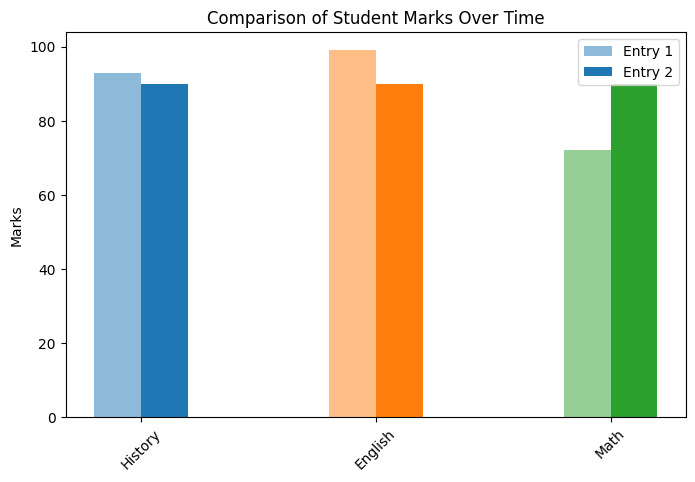

In [22]:
import tkinter as tk
from tkinter import ttk, messagebox
# import tensorflow as tf
# from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Make sure to import any other required modules (e.g., numpy) and define Student/get_student accordingly.

class GUI:
    def __init__(self):
        self.output = None
        # self.student = Student()
        self.server = None
        self.root = tk.Tk()
        self.root.title("Student Management System")
        self.root.geometry("500x500")

        self.create_main_menu()

        self.output_frame = tk.Label(self.root, text=self.output, font=("Arial", 10),
                                     wraplength=350, background="lightblue", width=40, height=10)
        self.output_frame.pack(pady=10, expand=True, fill=tk.BOTH)
        
        self.root.mainloop()

    def create_main_menu(self):
        ttk.Label(self.root, text="Student Management System", font=("Arial", 14, "bold")).pack(pady=10)
        
        buttons = [
            ("Add Student", self.add_student),
            ("Remove Student", self.remove_student),
            ("Update Student", self.update_student),
            ("Update Marks", self.update_marks),
            # ("Predict SGPA", self.predict_sgpa),
            ("Get Recommendation", self.get_recommendation),
            # ("Make Student Groups", self.make_student_groups),
            ("Get Student Reports", self.get_student_reports)
        ]
        
        for text, command in buttons:
            ttk.Button(self.root, text=text, command=command).pack(pady=5, fill=tk.X, padx=20)

    def add_student(self):
        self.student_form()

    def student_form(self):
        # Main form field definitions.
        self.main_form_data = {
            "Name": "Full name of the student",
            "School": ["P - Private", "G - Government"],
            "Sex": ["M - Male", "F - Female"],
            "Age": "15-22",
            "Address": ["U - Urban", "R - Rural"],
            "FamilySize": ["LE3 - Less than 3", "GT3 - Greater than 3"],
            "ParentStatus": ["T - Together", "A - Apart"],
            "MotherEdu": "0-4",
            "FatherEdu": "0-4",
            "MotherJob": "teacher, health, services, at_home, other",
            "FatherJob": "teacher, health, services, at_home, other",
            "Reason": "home, reputation, course, other",
            "Guardian": "mother, father, other",
            "TravelTime": "1 - <15min, 2 - 15-30min, 3 - 30-60min, 4 - >1hr",
            "StudyTime": "1 - <2hrs, 2 - 2-5hrs, 3 - 5-10hrs, 4 - >10hrs",
            "Failures": "0-4",
            "SchoolSup": ["yes", "no"],
            "FamilySup": ["yes", "no"],
            "Paid": ["yes", "no"],
            "Activities": ["yes", "no"],
            "Nursery": ["yes", "no"],
            "HigherEdu": ["yes", "no"],
            "Internet": ["yes", "no"],
            "Romantic": ["yes", "no"],
            "FamilyRel": "1 - very bad to 5 - excellent",
            "FreeTime": "1-5",
            "GoOut": "1-5",
            "Health": "1 - very bad to 5 - very good",
            "Absences": "0-93",
            "Subjects": "Enter number of subjects (e.g., 3)"
        }
        # We'll save the subject details in a separate variable
        self.subject_details = None

        student_root = tk.Toplevel(self.root)
        student_root.title("Student Information Form")
        student_root.geometry("700x700")
        canvas = tk.Canvas(student_root)
        scrollbar = ttk.Scrollbar(student_root, orient="vertical", command=canvas.yview)
        frame = ttk.Frame(canvas)

        canvas.create_window((0, 0), window=frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        
        # Dictionary to store main form widget references.
        self.entries = {}

        def open_subject_window():
            # Retrieve the number of subjects from the "Subjects" field.
            try:
                count = int(self.entries["Subjects"][1].get())
            except ValueError:
                messagebox.showerror("Invalid input", "Please enter a valid integer for the number of subjects.")
                return
            
            subject_win = tk.Toplevel(student_root)
            subject_win.title("Enter Subject Details")
            subject_win.geometry("400x300")
            subj_frame = ttk.Frame(subject_win)
            subj_frame.pack(padx=10, pady=10, fill="both", expand=True)
            
            # Create headers
            ttk.Label(subj_frame, text="Subject Name", font=("Arial", 10, "bold")).grid(row=0, column=0, padx=5, pady=5)
            ttk.Label(subj_frame, text="Marks", font=("Arial", 10, "bold")).grid(row=0, column=1, padx=5, pady=5)
            ttk.Label(subj_frame, text="Credits", font=("Arial", 10, "bold")).grid(row=0, column=2, padx=5, pady=5)
            
            # Create a list to hold subject entries for this window.
            subject_entries_local = []
            for i in range(count):
                row = i + 1
                subj_entry = ttk.Entry(subj_frame, width=15)
                subj_entry.grid(row=row, column=0, padx=5, pady=5)
                marks_entry = ttk.Entry(subj_frame, width=8)
                marks_entry.grid(row=row, column=1, padx=5, pady=5)
                credits_entry = ttk.Entry(subj_frame, width=8)
                credits_entry.grid(row=row, column=2, padx=5, pady=5)
                subject_entries_local.append({
                    "Subject": subj_entry,
                    "Marks": marks_entry,
                    "Credits": credits_entry
                })
            
            def save_subject_details():
                # Save entered details into the parent variable
                self.subject_details = {
                    "Subjects": [entry["Subject"].get() for entry in subject_entries_local],
                    "Marks": [entry["Marks"].get() for entry in subject_entries_local],
                    "Credits": [entry["Credits"].get() for entry in subject_entries_local]
                }
                subject_win.destroy()
            
            ttk.Button(subj_frame, text="OK", command=save_subject_details).grid(row=count+1, column=0, columnspan=3, pady=10)
        
        # Build the main form fields.
        for idx, (key, value) in enumerate(self.main_form_data.items()):
            ttk.Label(frame, text=key + ":", font=("Arial", 10, "bold")).grid(
                row=idx, column=0, sticky="w", padx=10, pady=5)
            
            if isinstance(value, list) and len(value) == 2:
                var = tk.StringVar(master=student_root, value=value[0])
                ttk.Radiobutton(frame, text=value[0], variable=var, value=value[0]).grid(
                    row=idx, column=1, padx=5)
                ttk.Radiobutton(frame, text=value[1], variable=var, value=value[1]).grid(
                    row=idx, column=2, padx=5)
                self.entries[key] = (var, None)
            elif isinstance(value, list) and len(value) > 2:  # Multi-choice dropdown
                var = tk.StringVar(master=student_root, value=value[0])
                dropdown = ttk.Combobox(frame, textvariable=var, values=value, state="readonly", width=20)
                dropdown.grid(row=idx, column=1, columnspan=2, padx=10, pady=5)
                self.entries[key] = var
            else:
                entry = ttk.Entry(frame, width=30)
                entry.grid(row=idx, column=1, padx=10, pady=5)
                ttk.Label(frame, text=value).grid(row=idx, column=2, padx=10, pady=5)
                self.entries[key] = (None, entry)
        
        # Button to open the separate subject details window.
        ttk.Button(frame, text="Enter Subject Details", command=open_subject_window).grid(
            row=len(self.main_form_data), column=0, columnspan=3, pady=10)

        # Submit button.
        submit_btn = ttk.Button(frame, text="Submit", command=lambda: send_data(student_root))
        submit_btn.grid(row=len(self.main_form_data)+1, column=0, columnspan=3, pady=20)
        
        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")
        frame.update_idletasks()
        canvas.config(scrollregion=canvas.bbox("all"))
        
        def send_data(win):
            # Collect data from the main form.
            row_data = {}
            for key, widget in self.entries.items():
                if isinstance(widget, tuple):
                    if widget[0]:
                        row_data[key] = widget[0].get()
                    else:
                        row_data[key] = widget[1].get()
                else:
                    row_data[key] = widget.get()
            
            # Add subject details if they exist.
            if self.subject_details:
                row_data["Subjects"] = self.subject_details["Subjects"]
                row_data["Marks"] = self.subject_details["Marks"]
                row_data["Credits"] = self.subject_details["Credits"]
            else:
                row_data["Subjects"] = []
                row_data["Marks"] = []
                row_data["Credits"] = []
            
            print(row_data)
            # Create a Student object using the collected data.
            # Ensure the Student class is defined elsewhere.
            self.student = Student(
                row_data["Name"], row_data["School"], row_data["Sex"], row_data["Age"], row_data["Address"],
                row_data["FamilySize"], row_data["ParentStatus"], row_data["MotherEdu"], row_data["FatherEdu"],
                row_data["MotherJob"], row_data["FatherJob"], row_data["Reason"], row_data["Guardian"], row_data["TravelTime"],
                row_data["StudyTime"], row_data["Failures"], row_data["SchoolSup"], row_data["FamilySup"], row_data["Paid"],
                row_data["Activities"], row_data["Nursery"], row_data["HigherEdu"], row_data["Internet"], row_data["Romantic"],
                row_data["FamilyRel"], row_data["FreeTime"], row_data["GoOut"], row_data["Health"], row_data["Absences"],
                row_data["Subjects"], row_data["Marks"], row_data["Credits"]
            )

            self.update_output(self.student.massage)
            win.destroy()

    def remove_student(self):
        data = {
            "Name": "Full name of the student",
            "Age": "15-22",
            "School": ["P - Private", "G - Government"],
            "Sex": ["M - Male", "F - Female"],
        }

        student_root = tk.Toplevel(self.root)
        student_root.title("Student Removal Form")
        student_root.geometry("500x400")
        canvas = tk.Canvas(student_root)
        scrollbar = ttk.Scrollbar(student_root, orient="vertical", command=canvas.yview)
        frame = ttk.Frame(canvas)

        canvas.create_window((0, 0), window=frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        
        entries = {}
        
        def send_data():
            row_data = {key: var.get() if isinstance(var, tk.StringVar) else entry.get() 
                        for key, (var, entry) in entries.items()}
            # self.server.remove_student(row_data["Name"], row_data["School"], row_data["Age"], row_data["Sex"])
            # if hasattr(self, "student"):
            #     student = self.student
            # else:
            #     student = Student(row_data["Name"], row_data["Age"], row_data["School"], row_data["Sex"])
            student,student_id=get_student(row_data,remove=True)
            if isinstance(student_id, str):
                self.update_output("NO student found with that criteria.")
                # print(row_data)
            else:
                student.remove_student(student_id)
                self.update_output(student.massage)
            student_root.destroy()

        for idx, (key, value) in enumerate(data.items()):
            ttk.Label(frame, text=key + ":", font=("Arial", 10, "bold")).grid(
                row=idx, column=0, sticky="w", padx=10, pady=5)
            
            if isinstance(value, list) and len(value) == 2:
                var = tk.StringVar(master=student_root, value=value[0])
                ttk.Radiobutton(frame, text=value[0], variable=var, value=value[0]).grid(
                    row=idx, column=1, padx=5)
                ttk.Radiobutton(frame, text=value[1], variable=var, value=value[1]).grid(
                    row=idx, column=2, padx=5)
                entries[key] = (var, None)
            else:
                entry = ttk.Entry(frame, width=30)
                entry.grid(row=idx, column=1, padx=10, pady=5)
                ttk.Label(frame, text=value).grid(row=idx, column=2, padx=10, pady=5)
                entries[key] = (None, entry)
        
        ttk.Button(frame, text="Submit", command=send_data).grid(
            row=len(data), column=0, columnspan=3, pady=20)
        
        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")
        frame.update_idletasks()
        canvas.config(scrollregion=canvas.bbox("all"))

    def update_student(self):
        self.main_form_data = {
            "Name": "Full name of the student",
            "School": ["P - Private", "G - Government"],
            "Sex": ["M - Male", "F - Female"],
            "Age": "15-22",
            "Address": ["U - Urban", "R - Rural"],
            "FamilySize": ["LE3 - Less than 3", "GT3 - Greater than 3"],
            "ParentStatus": ["T - Together", "A - Apart"],
            "MotherEdu": "0-4",
            "FatherEdu": "0-4",
            "MotherJob": "teacher, health, services, at_home, other",
            "FatherJob": "teacher, health, services, at_home, other",
            "Reason": "home, reputation, course, other",
            "Guardian": "mother, father, other",
            "TravelTime": "1 - <15min, 2 - 15-30min, 3 - 30-60min, 4 - >1hr",
            "StudyTime": "1 - <2hrs, 2 - 2-5hrs, 3 - 5-10hrs, 4 - >10hrs",
            "Failures": "0-4",
            "SchoolSup": ["yes", "no"],
            "FamilySup": ["yes", "no"],
            "Paid": ["yes", "no"],
            "Activities": ["yes", "no"],
            "Nursery": ["yes", "no"],
            "HigherEdu": ["yes", "no"],
            "Internet": ["yes", "no"],
            "Romantic": ["yes", "no"],
            "FamilyRel": "1 - very bad to 5 - excellent",
            "FreeTime": "1-5",
            "GoOut": "1-5",
            "Health": "1 - very bad to 5 - very good",
            "Absences": "0-93",
            "Subjects": "Enter number of subjects (e.g., 3)"
        }
        # We'll save the subject details in a separate variable
        self.subject_details = None

        student_root = tk.Toplevel(self.root)
        student_root.title("Student Information Form")
        student_root.geometry("700x700")
        canvas = tk.Canvas(student_root)
        scrollbar = ttk.Scrollbar(student_root, orient="vertical", command=canvas.yview)
        frame = ttk.Frame(canvas)

        canvas.create_window((0, 0), window=frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        
        # Dictionary to store main form widget references.
        self.entries = {}

        def open_subject_window():
            # Retrieve the number of subjects from the "Subjects" field.
            try:
                count = int(self.entries["Subjects"][1].get())
            except ValueError:
                messagebox.showerror("Invalid input", "Please enter a valid integer for the number of subjects.")
                return
            
            subject_win = tk.Toplevel(student_root)
            subject_win.title("Enter Subject Details")
            subject_win.geometry("400x300")
            subj_frame = ttk.Frame(subject_win)
            subj_frame.pack(padx=10, pady=10, fill="both", expand=True)
            
            # Create headers
            ttk.Label(subj_frame, text="Subject Name", font=("Arial", 10, "bold")).grid(row=0, column=0, padx=5, pady=5)
            ttk.Label(subj_frame, text="Marks", font=("Arial", 10, "bold")).grid(row=0, column=1, padx=5, pady=5)
            ttk.Label(subj_frame, text="Credits", font=("Arial", 10, "bold")).grid(row=0, column=2, padx=5, pady=5)
            
            # Create a list to hold subject entries for this window.
            subject_entries_local = []
            for i in range(count):
                row = i + 1
                subj_entry = ttk.Entry(subj_frame, width=15)
                subj_entry.grid(row=row, column=0, padx=5, pady=5)
                marks_entry = ttk.Entry(subj_frame, width=8)
                marks_entry.grid(row=row, column=1, padx=5, pady=5)
                credits_entry = ttk.Entry(subj_frame, width=8)
                credits_entry.grid(row=row, column=2, padx=5, pady=5)
                subject_entries_local.append({
                    "Subject": subj_entry,
                    "Marks": marks_entry,
                    "Credits": credits_entry
                })
            
            def save_subject_details():
                # Save entered details into the parent variable
                self.subject_details = {
                    "Subjects": [entry["Subject"].get() for entry in subject_entries_local],
                    "Marks": [entry["Marks"].get() for entry in subject_entries_local],
                    "Credits": [entry["Credits"].get() for entry in subject_entries_local]
                }
                subject_win.destroy()
            
            ttk.Button(subj_frame, text="OK", command=save_subject_details).grid(row=count+1, column=0, columnspan=3, pady=10)
        
        # Build the main form fields.
        for idx, (key, value) in enumerate(self.main_form_data.items()):
            ttk.Label(frame, text=key + ":", font=("Arial", 10, "bold")).grid(
                row=idx, column=0, sticky="w", padx=10, pady=5)
            
            if isinstance(value, list) and len(value) == 2:
                var = tk.StringVar(master=student_root, value=value[0])
                ttk.Radiobutton(frame, text=value[0], variable=var, value=value[0]).grid(
                    row=idx, column=1, padx=5)
                ttk.Radiobutton(frame, text=value[1], variable=var, value=value[1]).grid(
                    row=idx, column=2, padx=5)
                self.entries[key] = (var, None)
            elif isinstance(value, list) and len(value) > 2:  # Multi-choice dropdown
                var = tk.StringVar(master=student_root, value=value[0])
                dropdown = ttk.Combobox(frame, textvariable=var, values=value, state="readonly", width=20)
                dropdown.grid(row=idx, column=1, columnspan=2, padx=10, pady=5)
                self.entries[key] = var
            else:
                entry = ttk.Entry(frame, width=30)
                entry.grid(row=idx, column=1, padx=10, pady=5)
                ttk.Label(frame, text=value).grid(row=idx, column=2, padx=10, pady=5)
                self.entries[key] = (None, entry)
        
        # Button to open the separate subject details window.
        ttk.Button(frame, text="Enter Subject Details", command=open_subject_window).grid(
            row=len(self.main_form_data), column=0, columnspan=3, pady=10)

        # Submit button.
        submit_btn = ttk.Button(frame, text="Submit", command=lambda: send_data(student_root))
        submit_btn.grid(row=len(self.main_form_data)+1, column=0, columnspan=3, pady=20)
        
        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")
        frame.update_idletasks()
        canvas.config(scrollregion=canvas.bbox("all"))
        
        def send_data(win):
            # Collect data from the main form.
            row_data = {}
            for key, widget in self.entries.items():
                if isinstance(widget, tuple):
                    if widget[0]:
                        row_data[key] = widget[0].get()
                    else:
                        row_data[key] = widget[1].get()
                else:
                    row_data[key] = widget.get()
            
            # Add subject details if they exist.
            if self.subject_details:
                row_data["Subjects"] = self.subject_details["Subjects"]
                row_data["Marks"] = self.subject_details["Marks"]
                row_data["Credits"] = self.subject_details["Credits"]
            else:
                row_data["Subjects"] = []
                row_data["Marks"] = []
                row_data["Credits"] = []
            
            print(row_data)
            # Create a Student object using the collected data.
            # Ensure the Student class is defined elsewhere.
            # std=get_student()
            self.student = Student(
                row_data["Name"], row_data["School"], row_data["Sex"], row_data["Age"], row_data["Address"],
                row_data["FamilySize"], row_data["ParentStatus"], row_data["MotherEdu"], row_data["FatherEdu"],
                row_data["MotherJob"], row_data["FatherJob"], row_data["Reason"], row_data["Guardian"], row_data["TravelTime"],
                row_data["StudyTime"], row_data["Failures"], row_data["SchoolSup"], row_data["FamilySup"], row_data["Paid"],
                row_data["Activities"], row_data["Nursery"], row_data["HigherEdu"], row_data["Internet"], row_data["Romantic"],
                row_data["FamilyRel"], row_data["FreeTime"], row_data["GoOut"], row_data["Health"], row_data["Absences"],
                row_data["Subjects"], row_data["Marks"], row_data["Credits"],append=False,update=True
            )
            # self.student.update_student()
            self.update_output(self.student.massage)
            win.destroy()


   

    def get_recommendation(self):
        recommendation = tk.Tk()
        recommendation.title("Recommendation")
        recommendation.geometry("500x500")
        re_frame = tk.Frame(recommendation)
        re_frame.pack()
        data = {
            "Name": "Full name of the student",
            "Age": "15-22",
            "School": ["P - Private", "G - Government"],
            "Sex": ["M - Male", "F - Female"],
        }
        entries = {}
        def submit():
            form_data = {}
            for key, widget in entries.items():
                form_data[key] = widget.get()
            print("Form data:", form_data)
            student = get_student(form_data)  # Ensure get_student is defined elsewhere.
            if isinstance(student, str):
                self.update_output(student)
            else:
                advices = student.recommendation()
                advice_text = "\n".join(f"{i+1}. {advice}" for i, advice in enumerate(advices))
                self.update_output(advice_text)
            print(student)
            recommendation.destroy()

        for idx, (key, value) in enumerate(data.items()):
            ttk.Label(re_frame, text=key + ":", font=("Arial", 10, "bold")).grid(
                row=idx, column=0, sticky="w", padx=10, pady=5)
            if isinstance(value, list) and len(value) == 2:
                var = tk.StringVar(master=recommendation, value=value[0])
                ttk.Radiobutton(re_frame, text=value[0], variable=var, value=value[0]).grid(
                    row=idx, column=1, padx=5)
                ttk.Radiobutton(re_frame, text=value[1], variable=var, value=value[1]).grid(
                    row=idx, column=2, padx=5)
                entries[key] = var
            else:
                entry = ttk.Entry(re_frame, width=30)
                entry.grid(row=idx, column=1, padx=10, pady=5)
                ttk.Label(re_frame, text=value).grid(row=idx, column=2, padx=10, pady=5)
                entries[key] = entry
        button1 = tk.Button(re_frame, text="Submit", command=submit)
        button1.grid(row=len(data), column=0, columnspan=3, pady=20)
        
        recommendation.mainloop()

    def update_marks(self):
        update_mark = tk.Toplevel(self.root)
        update_mark.title("Update Marks")
        update_mark.geometry("500x500")

        re_frame = tk.Frame(update_mark)
        re_frame.pack()

        data = {
            "Name": "Full name of the student",
            "Age": "15-22",
            "School": ["P - Private", "G - Government"],
            "Sex": ["M - Male", "F - Female"],
            "Subjects": "Enter number of subjects",
        }
        entries = {}

        def open_subject_window(length):
            try:
                count = int(length)
            except ValueError:
                messagebox.showerror("Invalid input", "Please enter a valid integer for the number of subjects.")
                return None
            
            subject_win = tk.Toplevel(update_mark)
            subject_win.title("Enter Subject Details")
            subject_win.geometry("400x300")

            subj_frame = ttk.Frame(subject_win)
            subj_frame.pack(padx=10, pady=10, fill="both", expand=True)

            ttk.Label(subj_frame, text="Subject Name", font=("Arial", 10, "bold")).grid(row=0, column=0, padx=5, pady=5)
            ttk.Label(subj_frame, text="Marks", font=("Arial", 10, "bold")).grid(row=0, column=1, padx=5, pady=5)
            ttk.Label(subj_frame, text="Credits", font=("Arial", 10, "bold")).grid(row=0, column=2, padx=5, pady=5)
            
            subject_entries_local = []
            for i in range(count):
                row = i + 1
                subj_entry = ttk.Entry(subj_frame, width=15)
                subj_entry.grid(row=row, column=0, padx=5, pady=5)
                marks_entry = ttk.Entry(subj_frame, width=8)
                marks_entry.grid(row=row, column=1, padx=5, pady=5)
                credits_entry = ttk.Entry(subj_frame, width=8)
                credits_entry.grid(row=row, column=2, padx=5, pady=5)
                subject_entries_local.append({
                    "Subject": subj_entry,
                    "Marks": marks_entry,
                    "Credits": credits_entry
                })

            def save_subject_details():
                subject_details = {
                    "Subjects": [entry["Subject"].get() for entry in subject_entries_local],
                    "Marks": [entry["Marks"].get() for entry in subject_entries_local],
                    "Credits": [entry["Credits"].get() for entry in subject_entries_local]
                }
                subject_win.destroy()
                self.subject_details = subject_details  # Store it at class level

            ttk.Button(subj_frame, text="OK", command=save_subject_details).grid(row=count+1, column=0, columnspan=3, pady=10)
            subject_win.wait_window()  # Wait until subject window is closed
            return self.subject_details  # Return collected data
        
        def submit():
            form_data = {key: widget.get() for key, widget in entries.items()}
            print("Form data:", form_data)

            student,student_id = get_student(form_data,remove=True)  # Ensure get_student is defined

            if isinstance(student, str):
                self.update_output(student)
            else:
                # Call open_subject_window if student found
                # subjects_count = form_data.get(len(student.subjects), "0")
                subject_data = open_subject_window(int(form_data["Subjects"]))  # Convert to integer
                student.update_marks2(student_id,subject_data)
                
                if subject_data:
                    # print("Subjects entered:", subject_data)
                    self.subject_details = subject_data  # Store retrieved subject data
                    print("Subject data from the update marks",subject_data)
                
                # advices = student.recommendation()
                # advice_text = "\n".join(f"{i+1}. {advice}" for i, advice in enumerate(advices))
                # self.update_output(advice_text)

            update_mark.destroy()

       
        for idx, (key, value) in enumerate(data.items()):
            ttk.Label(re_frame, text=key + ":", font=("Arial", 10, "bold")).grid(row=idx, column=0, sticky="w", padx=10, pady=5)
            if isinstance(value, list) and len(value) == 2:
                var = tk.StringVar(value=value[0])
                ttk.Radiobutton(re_frame, text=value[0], variable=var, value=value[0]).grid(row=idx, column=1, padx=5)
                ttk.Radiobutton(re_frame, text=value[1], variable=var, value=value[1]).grid(row=idx, column=2, padx=5)
                entries[key] = var
            else:
                entry = ttk.Entry(re_frame, width=30)
                entry.grid(row=idx, column=1, padx=10, pady=5)
                ttk.Label(re_frame, text=value).grid(row=idx, column=2, padx=10, pady=5)
                entries[key] = entry

        tk.Button(re_frame, text="Submit", command=submit).grid(row=len(data), column=0, columnspan=3, pady=20)
        update_mark.mainloop()

    def get_student_reports(self):
        data = {
            "Name": "Full name of the student",
            "Age": "15-22",
            "School": ["P - Private", "G - Government"],
            "Sex": ["M - Male", "F - Female"],
        }

        student_root = tk.Toplevel(self.root)
        student_root.title("Student Removal Form")
        student_root.geometry("400x400")
        canvas = tk.Canvas(student_root)
        scrollbar = ttk.Scrollbar(student_root, orient="vertical", command=canvas.yview)
        frame = ttk.Frame(canvas)

        canvas.create_window((0, 0), window=frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)
        
        entries = {}

        
        
        def make_graph(student_history, advices):
            if not student_history:
                return
            
            # Extract subjects, marks, and entry numbers
            subjects = student_history[0][1].split(",")  # Get subjects from the first entry
            num_entries = len(student_history)  # Number of records (old/new marks)
            
            marks_data = []  # List of lists for marks
            labels = []  # Labels for each entry (Entry Number)
            
            for record in student_history:
                marks_data.append(list(map(int, record[2].split(","))))  # Convert marks to integers
                labels.append(f"Entry {record[5]}")  # Use entry number as labels

            # Define base colors for subjects (repeats after `len(subjects)`)
            base_colors = ["blue", "green", "red", "purple", "orange", "cyan"]
            color_map = {subjects[i]: base_colors[i % len(base_colors)] for i in range(len(subjects))}
            
            # Create a new Tkinter window for the graph
            graph_window = tk.Toplevel()
            graph_window.title("Student Marks Comparison")

            # Create Matplotlib figure
            fig, ax = plt.subplots(figsize=(8, 5))
            
            # X locations for bars
            x = range(len(subjects))
            width = 0.2  # Bar width
            
            # Plot bars for each entry (Old vs New)
            for i in range(num_entries):
                alpha = 0.5 + (0.5 * i / (num_entries - 1)) if num_entries > 1 else 1.0  # Older entries are lighter
                ax.bar(
                    [pos + (i * width) for pos in x],  # Adjust positions for each entry
                    marks_data[i], 
                    width=width,
                    color=[plt.cm.get_cmap('tab10')(j) for j in range(len(subjects))], 
                    alpha=alpha,
                    label=labels[i]
                )

            # Set labels and title
            ax.set_xticks([pos + (width * (num_entries - 1) / 2) for pos in x])  # Center ticks
            ax.set_xticklabels(subjects, rotation=45)
            ax.set_ylabel("Marks")
            ax.set_title("Comparison of Student Marks Over Time")
            ax.legend()

            # Embed graph in Tkinter window
            canvas = FigureCanvasTkAgg(fig, master=graph_window)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

            # Display advices below the graph
            advice_text = "\n".join(advices) if advices else "No advice available."
            advice_label = tk.Label(graph_window, text=advice_text, font=("Arial", 10), justify="left", fg="darkred")
            advice_label.pack(pady=10)

            # Show the window
            graph_window.mainloop()

        
        def send_data():
            row_data = {key: var.get() if isinstance(var, tk.StringVar) else entry.get() 
                        for key, (var, entry) in entries.items()}
            # self.server.remove_student(row_data["Name"], row_data["School"], row_data["Age"], row_data["Sex"])
            # if hasattr(self, "student"):
            #     student = self.student
            # else:
            #     student = Student(row_data["Name"], row_data["Age"], row_data["School"], row_data["Sex"])
            student,student_id=get_student(row_data,remove=True)
            advices = student.recommendation()
            graph=True
            if isinstance(student_id, str):
                self.update_output("NO student found with that criteria.")
                graph=False
                # print(row_data)
            else:
                student_history=student.student_history(student_id)
            student_root.destroy()
            if graph:
                make_graph(student_history,advices)

        for idx, (key, value) in enumerate(data.items()):
            ttk.Label(frame, text=key + ":", font=("Arial", 10, "bold")).grid(
                row=idx, column=0, sticky="w", padx=10, pady=5)
            
            if isinstance(value, list) and len(value) == 2:
                var = tk.StringVar(master=student_root, value=value[0])
                ttk.Radiobutton(frame, text=value[0], variable=var, value=value[0]).grid(
                    row=idx, column=1, padx=5)
                ttk.Radiobutton(frame, text=value[1], variable=var, value=value[1]).grid(
                    row=idx, column=2, padx=5)
                entries[key] = (var, None)
            else:
                entry = ttk.Entry(frame, width=30)
                entry.grid(row=idx, column=1, padx=10, pady=5)
                ttk.Label(frame, text=value).grid(row=idx, column=2, padx=10, pady=5)
                entries[key] = (None, entry)
        
        ttk.Button(frame, text="Submit", command=send_data).grid(
            row=len(data), column=0, columnspan=3, pady=20)
        
        canvas.pack(side="left", fill="both", expand=True)
        scrollbar.pack(side="right", fill="y")
        frame.update_idletasks()
        canvas.config(scrollregion=canvas.bbox("all"))

    
    def make_student_groups(self):
        print("Generating Student Reports...")

    def update_output(self, text):
        self.output = text
        self.output_frame.config(text=self.output)
    
if __name__ == "__main__":
    GUI()
